In [174]:
import pandas as pd
import sys
import os

notebook_dir = os.path.abspath('')

scripts_dir = os.path.join(os.path.dirname(notebook_dir), 'scripts')
sys.path.append(scripts_dir)

# 引入先前寫過判斷打席結果與方向的函式
from categorize_at_bat_result import categorize_at_bat_result


# 引入已清理過的逐球記錄
cleaned_labled_file_path = '../labeled/jose_ramos_pitches_df_cleaned.csv'

pitches_df = pd.read_csv(cleaned_labled_file_path)

print("DataFrame Shape:", pitches_df.shape)


DataFrame Shape: (93, 27)


In [175]:
# 引入打席記錄
abs_path = "../labeled/50_abs_jose_ramos_20240308.csv"
abs_df = pd.read_csv(abs_path)
abs_df.head(1)


,abs_id,file_name,file_name_date,file_name_player_name,file_name_pitcher_type,file_name_at_bat_number,file_name_result,is_filename_result_consistent,inning,at_bat_result,weather,game_time
0,1,2022-09-10 Jose Ramos VS 右投 打席2_二飛.mp4,2022-09-10,Jose Ramos,RHP,2,二飛,True,4,4F,sunny,day


In [176]:
# 多了  'any_on_base', 'base_combination' 
pitches_df.columns


Index(['id', 'abs_id', 'nth_pitch_ab', 'out_count', 'strike_count',
       'ball_count', 'is_rhp', 'has_stealing_attempt', 'pitch_type',
       'pitch_release', 'is_obvious_off_zone', 'is_pitch_ended_catcher_want',
       'has_swing', 'has_first_base_runner', 'has_second_base_runner',
       'has_third_base_runner', 'has_visible_shift', 'score_diffrence',
       'is_team_leading', 'has_swing_intention', 'horizontal_ending',
       'vertical_ending', 'is_swing_delayed', 'is_swing_early', 'is_whiff',
       'any_on_base', 'base_combination'],
      dtype='object')

In [177]:
pitches_df.head(1)


,id,abs_id,nth_pitch_ab,out_count,strike_count,ball_count,is_rhp,has_stealing_attempt,pitch_type,pitch_release,...,score_diffrence,is_team_leading,has_swing_intention,horizontal_ending,vertical_ending,is_swing_delayed,is_swing_early,is_whiff,any_on_base,base_combination
0,4e1e4436-2ba9-41a0-b88a-5cc4641edcbe,1,1,0,0,0,True,False,slider,overhand,...,1,True,False,outside,low,False,False,False,False,0


### 什麼樣的球會打成安打？

In [178]:
# 計算打席結果比例
abs_df['at_bat_result_group'] = abs_df['at_bat_result'].apply(categorize_at_bat_result)

group_counts = abs_df['at_bat_result_group'].value_counts(normalize=True) * 100

print(group_counts)


at_bat_result_group
三振     34.0
安打     20.0
飛球     18.0
滾地球    18.0
保送     10.0
Name: proportion, dtype: float64


In [179]:
# 只有標記一半的打席
# 所有打席最後一球

last_pitches = pitches_df.loc[pitches_df.groupby('abs_id')['nth_pitch_ab'].idxmax()]


last_pitches['ending_combination'] = last_pitches['horizontal_ending'] + '_' + last_pitches['vertical_ending']

total_ending_combinations = last_pitches['ending_combination'].value_counts()

total_ending_combinations


ending_combination
outside_low       8
middle_high       7
outside_middle    3
middle_middle     2
outside_high      2
inside_middle     2
inside_high       1
middle_low        1
Name: count, dtype: int64

In [180]:

# 每個安打打席的最後一球
hits_abs_ids = abs_df[abs_df['at_bat_result_group'] == '安打']['abs_id']

hits_pitches = pitches_df[pitches_df['abs_id'].isin(hits_abs_ids)]

last_pitches_of_hits = hits_pitches.loc[hits_pitches.groupby('abs_id')[
    'nth_pitch_ab'].idxmax()]

last_pitches_of_hits

,id,abs_id,nth_pitch_ab,out_count,strike_count,ball_count,is_rhp,has_stealing_attempt,pitch_type,pitch_release,...,score_diffrence,is_team_leading,has_swing_intention,horizontal_ending,vertical_ending,is_swing_delayed,is_swing_early,is_whiff,any_on_base,base_combination
11,6fbaf895-e887-4592-ab42-d0b8315c538a,4,4,1,2,1,False,False,slider,overhand,...,1,True,True,outside,low,False,False,False,True,110
25,41e333bd-af47-4cf3-bc85-dd6e3906ec73,7,1,0,0,0,True,False,curve,overhand,...,0,False,True,middle,middle,False,False,False,True,111
55,05d8cd8a-bb53-4590-a641-fbd6d76ce299,15,3,0,1,1,True,False,slider,overhand,...,9,True,True,middle,high,False,False,False,True,100
59,45d2a47a-41f6-46c8-a003-cef7e27b0b23,16,5,0,2,2,True,False,slider,overhand,...,3,False,True,outside,low,False,False,False,True,100
86,7cf561c0-e16d-4d49-9a1a-2edcc0aea85e,41,2,0,1,0,True,False,four_seam,overhand,...,6,True,True,middle,low,False,False,False,True,101
92,a480bdc7-746b-4464-b7c9-1c6cb868cbc3,45,6,2,2,2,True,False,slider,overhand,...,2,True,True,outside,middle,False,False,False,False,0


In [181]:
# 根據球種
hit_pitch_type_proportions = last_pitches_of_hits['pitch_type'].value_counts(normalize=True) * 100

hit_pitch_type_proportions

pitch_type
slider       66.666667
curve        16.666667
four_seam    16.666667
Name: proportion, dtype: float64

In [182]:
# 合併 horizontal_ending 和 vertical_ending 成為一個新的組合欄位
last_pitches_of_hits['ending_combination'] = last_pitches_of_hits['horizontal_ending'] + '_' + last_pitches_of_hits['vertical_ending']

# 計算每種組合的佔比
hit_ending_combination_proportions = last_pitches_of_hits['ending_combination'].value_counts(normalize=True) * 100

# 顯示結果
print(hit_ending_combination_proportions)


ending_combination
outside_low       33.333333
middle_middle     16.666667
middle_high       16.666667
middle_low        16.666667
outside_middle    16.666667
Name: proportion, dtype: float64


In [183]:
# 計算安打率

hits_last_pitches = last_pitches[last_pitches['abs_id'].isin(hits_abs_ids)]
hits_ending_combinations = hits_last_pitches['ending_combination'].value_counts()

print(hits_ending_combinations)
print(hits_ending_combinations)

hit_rates = (hits_ending_combinations / total_ending_combinations)
hit_rates


ending_combination
outside_low       2
middle_middle     1
middle_high       1
middle_low        1
outside_middle    1
Name: count, dtype: int64
ending_combination
outside_low       2
middle_middle     1
middle_high       1
middle_low        1
outside_middle    1
Name: count, dtype: int64


ending_combination
inside_high            NaN
inside_middle          NaN
middle_high       0.142857
middle_low        1.000000
middle_middle     0.500000
outside_high           NaN
outside_low       0.250000
outside_middle    0.333333
Name: count, dtype: float64

In [184]:
# 製作各位置安打率
import itertools
hit_rates_df = hit_rates.reset_index()
hit_rates_df.columns = ['ending_combination', 'hit_rate']

hit_rates_df[['horizontal_ending', 'vertical_ending']] = hit_rates_df['ending_combination'].str.split('_', expand=True)

# ensure all 9 spots are included
expected_combinations = pd.DataFrame(list(itertools.product(['inside', 'middle', 'outside'], ['high', 'middle', 'low'])),
                                     columns=['horizontal_ending', 'vertical_ending'])
expected_combinations['ending_combination'] = expected_combinations['horizontal_ending'] + '_' + expected_combinations['vertical_ending']

# merge
full_hit_rates_df = pd.merge(expected_combinations, hit_rates_df[['ending_combination', 'hit_rate']], on='ending_combination', how='left')


hit_rates_df

,ending_combination,hit_rate,horizontal_ending,vertical_ending
0,inside_high,NaN,inside,high
1,inside_middle,NaN,inside,middle
2,middle_high,0.142857,middle,high
3,middle_low,1.000000,middle,low
4,middle_middle,0.500000,middle,middle
5,outside_high,NaN,outside,high
6,outside_low,0.250000,outside,low
7,outside_middle,0.333333,outside,middle


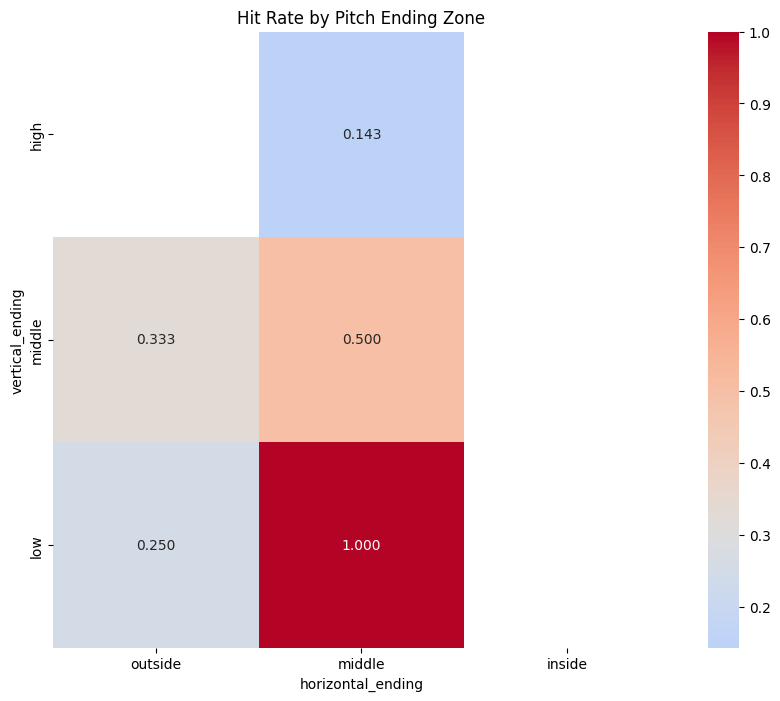

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# last_pitches_of_hits_data = {
#     'horizontal_ending': ['inside', 'outside', 'middle', 'inside', 'outside', 'middle', 'outside', 'middle', 'inside'],
#     'vertical_ending': ['high', 'high', 'high',  'middle', 'middle', 'middle', 'low', 'low', 'low'],

#     'hit_rate': hit_rates_df,
# }

# last_pitches_of_hits = pd.DataFrame(last_pitches_of_hits_data)

# 創建 pivot table
# pivot_table = last_pitches_of_hits.pivot(index='vertical_ending',
#                                          columns='horizontal_ending', values='hit_rate')

pivot_table = hit_rates_df.pivot(index='vertical_ending', columns='horizontal_ending', values='hit_rate').reindex(
    columns=['inside', 'middle', 'outside'], index=['high', 'middle', 'low'])


expected_vertical_order = ['high', 'middle', 'low']
expected_horizontal_order = ['outside', 'middle', 'inside']


pivot_table_reordered = pivot_table.reindex(index=expected_vertical_order,
                                            columns=expected_horizontal_order)


# cmap = sns.diverging_palette(240, 10, n=9, center="light", as_cmap=True)


plt.figure(figsize=(10, 8))
# sns.heatmap(pivot_table_reordered, annot=True,
#             fmt=".3f", cmap=cmap, square=True)
sns.heatmap(pivot_table_reordered, annot=True, fmt=".3f", cmap='coolwarm', square=True, center=0.3)

plt.title("Hit Rate by Pitch Ending Zone")
plt.show()


### 追打情形

In [186]:
obvious_off_zone_pitches = pitches_df.loc[pitches_df['is_obvious_off_zone'] == True]

print('row counts')
print(obvious_off_zone_pitches.shape[0])

obvious_off_zone_pitches.head(3)

row counts
32


,id,abs_id,nth_pitch_ab,out_count,strike_count,ball_count,is_rhp,has_stealing_attempt,pitch_type,pitch_release,...,score_diffrence,is_team_leading,has_swing_intention,horizontal_ending,vertical_ending,is_swing_delayed,is_swing_early,is_whiff,any_on_base,base_combination
4,04aed05c-1302-4121-bcc2-be9a8ef1a3c4,2,3,1,2,0,False,False,four_seam,overhand,...,1,True,True,middle,high,True,False,True,True,11
9,6a68a844-da62-4f2b-b950-0c7c5ea1258f,4,2,1,1,0,False,False,four_seam,overhand,...,1,True,True,outside,low,False,False,False,True,110
13,65a76667-fd96-4acc-92d9-5ff60c21983b,5,2,2,1,0,True,False,four_seam,overhand,...,0,False,True,middle,high,False,False,False,False,0
